In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import math 

In [5]:
regions = {
    1: [2, 6], 
    2: [6, 10], 
    3: [10, 14] 
}
tau1 = {
    1: 0.115, 
    2: 0.103, 
    3: 0.449 
}
tau1_err = {
    1: [0.005, 0.005], 
    2: [0.006, 0.007], 
    3: [0.044, 0.023] 
} 
tau2 = {
    1: 3.756, 
    2: 4.110, 
    3: 10.986 
}
tau2_err = {
    1: [0.130, 0.093], 
    2: [0.127, 0.145], 
    3: [0.367, 0.504] 
} 
tmax = {
    1: 4.647, 
    2: 4.085, 
    3: 3.059 
}
tmax_err = {
    1: [0.033, 0.059], 
    2: [0.032, 0.021], 
    3: [0.056, 0.030] 
}
sigma = {
    1: 3.805, 
    2: 5.635, 
    3: 10.348 
} 
sigma_err = {
    1: [0.113, 0.078], 
    2: [0.162, 0.214], 
    3: [0.171, 0.188] 
}
T = 13.2 
def Nratio(sigma_ratio, tau1, tau2, tmax): 
    return sigma_ratio * ( 
        tau1 * (1 - math.exp(-T / tau1)) 
    ) / (
        tau2 * (1 - math.exp(-(T - tmax) / tau2)) 
    )
def partial_sigma_ratio(sigma_ratio, tau1, tau2, tmax): 
    return tau1 * (1 - math.exp(-T / tau1)) / (
        tau2 * (1 - math.exp(-(T - tmax) / tau2)) 
    ) 
def partial_tau1(sigma_ratio, tau1, tau2, tmax): 
    return sigma_ratio / (
        tau2 * (1 - math.exp(-(T - tmax) / tau2)) 
    ) * (
        1 - math.exp(-T / tau1) - T / tau1 * math.exp(-T / tau1) 
    ) 
def partial_tau2(sigma_ratio, tau1, tau2, tmax): 
    return sigma_ratio * (
        tau1 * (1 - math.exp(-T / tau1)) 
    ) / (
        tau2**2 * (1 - math.exp(-(T - tmax) / tau2))**2 
    ) * (
        1 - math.exp(-(T - tmax) / tau2) - ((T - tmax) / tau2) * math.exp(-(T - tmax) / tau2) 
    ) 
def partial_tmax(sigma_ratio, tau1, tau2, tmax): 
    return sigma_ratio * (
        tau1 * (1 - math.exp(-T / tau1)) 
    ) / (
        tau2**2 * (1 - math.exp(-(T - tmax) / tau2))**2 
    ) * math.exp(-(T - tmax) / tau2) 
ratio = {} 
ratio_err = {} 
for region in regions.keys(): 
    ratio[region] = Nratio(sigma[region], tau1[region], tau2[region], tmax[region]) 
    ratio_err[region] = [0, 0] 
    for i in range(2): 
        args = (sigma[region], tau1[region], tau2[region], tmax[region]) 
        ratio_err[region][i] = math.sqrt(
            partial_sigma_ratio(*args)**2 * sigma_err[region][i]**2 + 
            partial_tau1(*args)**2 * tau1_err[region][i]**2 + 
            partial_tau2(*args)**2 * tau2_err[region][i]**2 + 
            partial_tmax(*args)**2 * tmax_err[region][i]**2 
        ) 

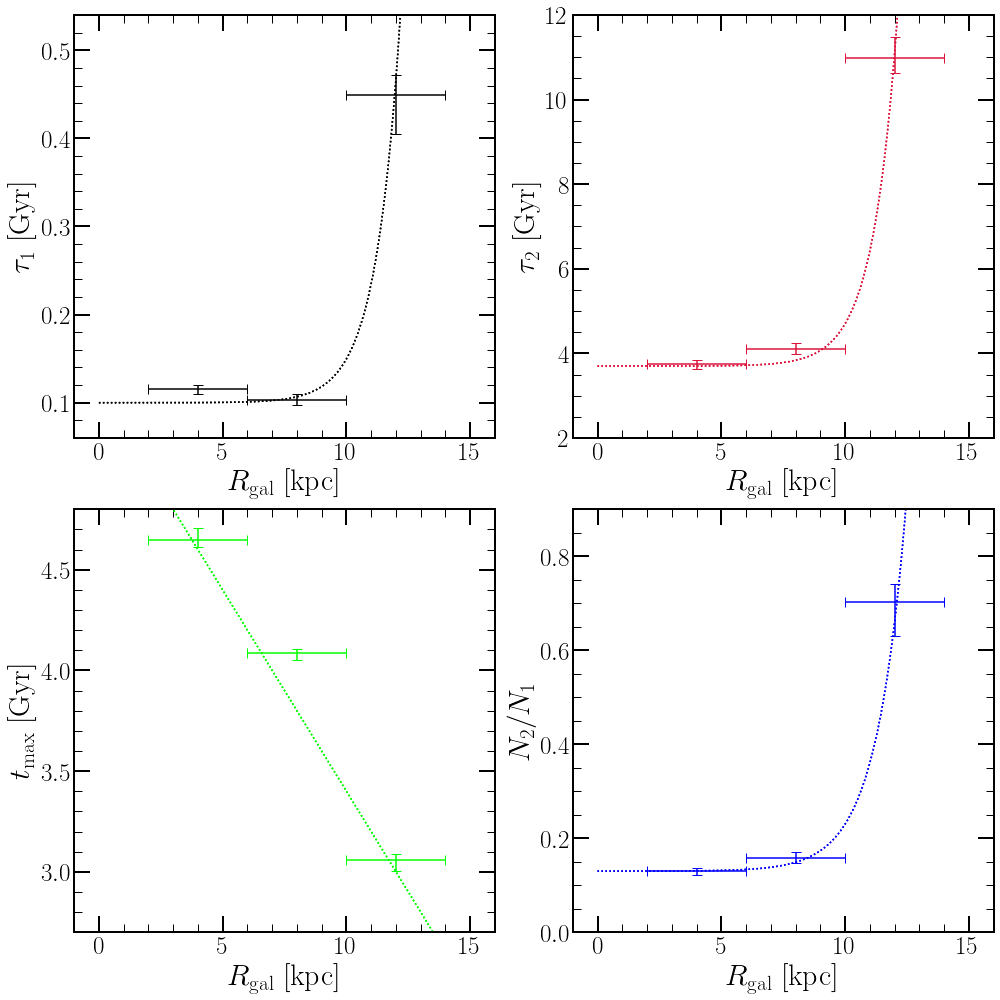

In [26]:
fig = plt.figure(figsize = (14, 14), facecolor = "white") 
axes = 4 * [None] 
ylabels = [r"$\tau_1$ [Gyr]", r"$\tau_2$ [Gyr]", r"$t_\text{max}$ [Gyr]", r"$N_2/N_1$"] 
ylim = [[0.06, 0.54], [2, 12], [2.7, 4.8], [0, 0.9]] 
for i in range(len(axes)): 
    axes[i] = fig.add_subplot(221 + i) 
    axes[i].set_xlabel(r"$R_\text{gal}$ [kpc]") 
    axes[i].set_ylabel(ylabels[i]) 
    axes[i].set_xlim([-1, 16]) 
    axes[i].set_ylim(ylim[i]) 
def plot_quantities(ax, measurement_dict, errors_dict, descriptor, color): 
    for region in regions.keys(): 
        kwargs = {
            "linestyle": ':', 
            "c": plots.mpltoolkit.named_colors()[color] 
        }
        xvals = [0.1 * _ for _ in range(151)] 
        yvals = [descriptor(_) for _ in xvals] 
        ax.plot(xvals, yvals, **kwargs) 
        x = [(regions[region][0] + regions[region][1]) / 2] 
        y = [measurement_dict[region]] 
        xerr = [(regions[region][1] - regions[region][0]) / 2] 
        yerr = [[errors_dict[region][0]], [errors_dict[region][1]]] 
        kwargs = {
            "xerr": xerr, 
            "yerr": yerr, 
            "c": plots.mpltoolkit.named_colors()[color] 
        }
        ax.errorbar(x, y, **kwargs) 
def tau1_descriptor(radius): 
    return 0.1 + math.exp((radius - 13) / 1) 
def tau2_descriptor(radius): 
    return 3.7 + math.exp((radius - 10) / 1.) 
def tmax_descriptor(radius): 
    return -1./5 * radius + 5.4 
def ratio_descriptor(radius): 
    return 0.13 + 0.1 * math.exp((radius - 10) / 1.2) 
#     return 0 
plot_quantities(axes[0], tau1, tau1_err, tau1_descriptor, "black") 
plot_quantities(axes[1], tau2, tau2_err, tau2_descriptor, "crimson") 
plot_quantities(axes[2], tmax, tmax_err, tmax_descriptor, "lime") 
plot_quantities(axes[3], ratio, ratio_err, ratio_descriptor, "blue") 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("spitoni2021_parameters.%s" % (ext)) 

In [27]:
print(tau1_descriptor(15.5)) 
print(tau2_descriptor(15.5)) 
print(tmax_descriptor(15.5)) 

12.282493960703473
248.39193226422037
2.3000000000000003
